# 04 - ML Model Training: CICIDS2017 Dataset

This notebook trains traditional machine learning models for intrusion detection.

## Objectives:
1. Load engineered features
2. Train supervised models: Random Forest, XGBoost, SVM, Decision Tree
3. Train unsupervised models: Isolation Forest, K-Means
4. Hyperparameter tuning with Grid Search
5. Model evaluation and comparison
6. Save best models

## 1. Setup and Imports

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import yaml
import joblib
import os
import time
from datetime import datetime

# ML models
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

# Model selection and evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Configuration and Data

In [5]:
# Load configuration

with open('../config/config.yaml', "r", encoding="utf-8") as f:

    config = yaml.safe_load(f)
print("✓ Configuration loaded")

# Load engineered features
processed_path = '../data/processed'

X_train = np.load(os.path.join(processed_path, 'X_train_engineered.npy'))
X_val = np.load(os.path.join(processed_path, 'X_val_engineered.npy'))
X_test = np.load(os.path.join(processed_path, 'X_test_engineered.npy'))
y_train = np.load(os.path.join(processed_path, 'y_train.npy'))
y_val = np.load(os.path.join(processed_path, 'y_val.npy'))
y_test = np.load(os.path.join(processed_path, 'y_test.npy'))

# Load label encoder
label_encoder = joblib.load(os.path.join(processed_path, 'label_encoder.pkl'))
from sklearn.preprocessing import LabelEncoder
label_encoder.fit(y_train)  # or original labels before transforming
print("Classes:", label_encoder.classes_)

print(f"\n✓ Data loaded successfully")
print(f"  Training samples: {X_train.shape}")
print(f"  Validation samples: {X_val.shape}")
print(f"  Test samples: {X_test.shape}")
print(f"  Number of classes: {len(np.unique(y_train))}")
print(f"  Classes: {label_encoder.classes_}")

✓ Configuration loaded
Classes: [0 1]

✓ Data loaded successfully
  Training samples: (2935076, 30)
  Validation samples: (252237, 30)
  Test samples: (504473, 30)
  Number of classes: 2
  Classes: [0 1]


## 3. Helper Functions

In [13]:
def evaluate_model(model, X_test, y_test, model_name="Model", label_encoder=None):
    print(f"\n{'='*60}")
    print(f"Evaluating {model_name}")
    print(f"{'='*60}")
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"\nAccuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Classification report
    if label_encoder is not None:
        target_names = [str(x) for x in label_encoder.classes_]
    else:
        target_names = None

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'predictions': y_pred
    }



def plot_confusion_matrix(cm, classes, model_name):
    """
    Plot confusion matrix
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


def save_model(model, model_name, metrics):
    """
    Save trained model and metrics
    """
    models_path = '../data/models'
    os.makedirs(models_path, exist_ok=True)
    
    # Save model
    model_file = os.path.join(models_path, f'{model_name}.pkl')
    joblib.dump(model, model_file)
    
    # Save metrics
    metrics_file = os.path.join(models_path, f'{model_name}_metrics.pkl')
    joblib.dump(metrics, metrics_file)
    
    print(f"\n✓ Model saved: {model_file}")
    print(f"✓ Metrics saved: {metrics_file}")

print("✓ Helper functions defined")

✓ Helper functions defined


## 4. Model 1: Random Forest Classifier


=== Training Random Forest Classifier ===

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.9min finished


✓ Training completed in 712.60 seconds

Evaluating Random Forest


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished



Accuracy:  0.9888
Precision: 0.9894
Recall:    0.9888
F1-Score:  0.9889

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    419297
           1       0.94      1.00      0.97     85176

    accuracy                           0.99    504473
   macro avg       0.97      0.99      0.98    504473
weighted avg       0.99      0.99      0.99    504473



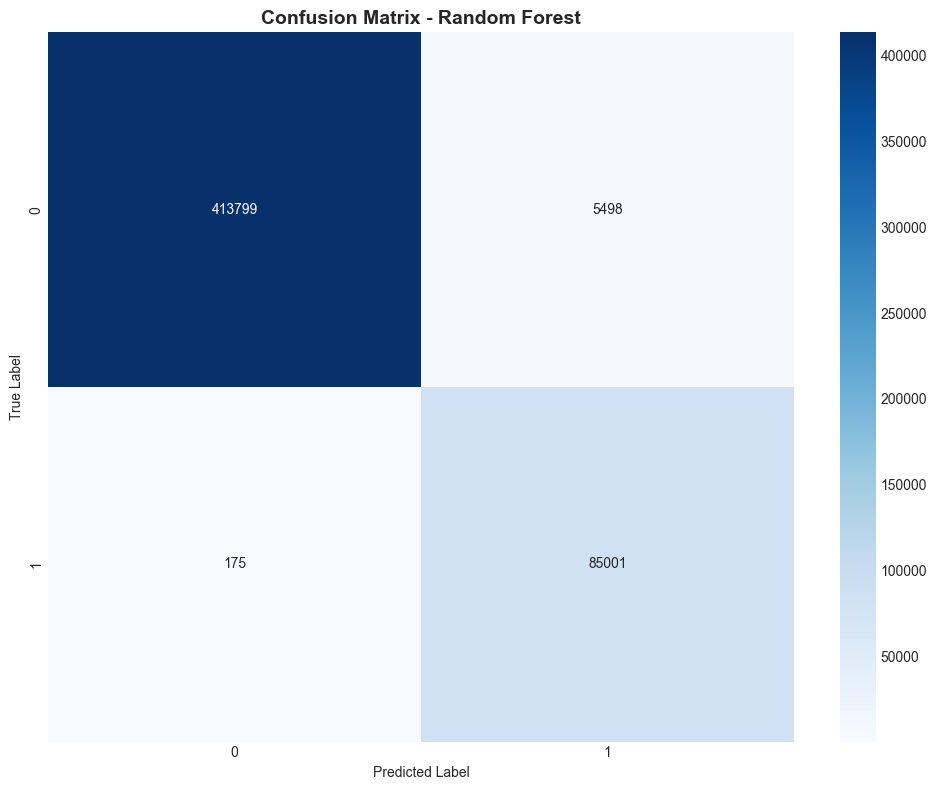


Top 10 Feature Importances:
  Feature 1: 0.1181
  Feature 2: 0.1035
  Feature 3: 0.0847
  Feature 4: 0.0847
  Feature 5: 0.0518
  Feature 6: 0.0462
  Feature 7: 0.0450
  Feature 8: 0.0440
  Feature 9: 0.0372
  Feature 10: 0.0338


In [14]:
print("\n=== Training Random Forest Classifier ===")

# Initial model with config parameters
rf_params = config['models']['random_forest']

rf_model = RandomForestClassifier(
    n_estimators=rf_params['n_estimators'],
    max_depth=rf_params['max_depth'],
    min_samples_split=rf_params['min_samples_split'],
    min_samples_leaf=rf_params['min_samples_leaf'],
    random_state=rf_params['random_state'],
    n_jobs=rf_params['n_jobs'],
    verbose=1
)

# Train
print("\nTraining Random Forest...")
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Evaluate
rf_metrics = evaluate_model(
    rf_model,
    X_test,
    y_test,
    model_name="Random Forest",
    label_encoder=label_encoder
)

rf_metrics['training_time'] = training_time

# Plot confusion matrix
plot_confusion_matrix(rf_metrics['confusion_matrix'], label_encoder.classes_, "Random Forest")

# Feature importance
feature_importance = rf_model.feature_importances_
print(f"\nTop 10 Feature Importances:")
for i, imp in enumerate(sorted(feature_importance, reverse=True)[:10]):
    print(f"  Feature {i+1}: {imp:.4f}")

In [16]:
np.unique(y_train)


array([0, 1])

## 5. Model 2: XGBoost Classifier


=== Training XGBoost Classifier ===

Training XGBoost...
✓ Training completed in 20.42 seconds

Evaluating XGBoost

Accuracy:  0.9874
Precision: 0.9882
Recall:    0.9874
F1-Score:  0.9876

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    419297
           1       0.93      1.00      0.96     85176

    accuracy                           0.99    504473
   macro avg       0.97      0.99      0.98    504473
weighted avg       0.99      0.99      0.99    504473



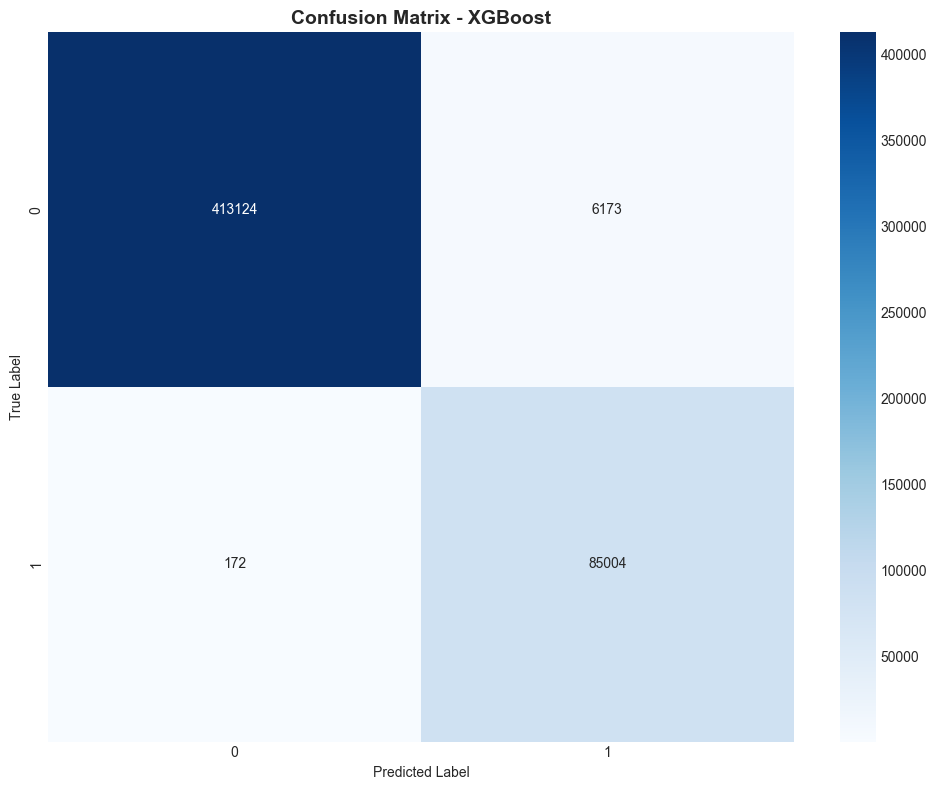

In [17]:
print("\n=== Training XGBoost Classifier ===")

# XGBoost parameters
xgb_params = config['models']['xgboost']

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',   # <- IMPORTANT
    eval_metric='logloss',         # <- binary metric
    n_estimators=xgb_params['n_estimators'],
    max_depth=xgb_params['max_depth'],
    learning_rate=xgb_params['learning_rate'],
    subsample=xgb_params['subsample'],
    colsample_bytree=xgb_params['colsample_bytree'],
    random_state=xgb_params['random_state'],
    n_jobs=-1
)


# Train
print("\nTraining XGBoost...")
start_time = time.time()
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Evaluate
xgb_metrics = evaluate_model(
    xgb_model,
    X_test,
    y_test,
    model_name="XGBoost",
    label_encoder=label_encoder
)
xgb_metrics['training_time'] = training_time

# Plot confusion matrix
plot_confusion_matrix(xgb_metrics['confusion_matrix'], label_encoder.classes_, "XGBoost")

## 6. Model 3: LightGBM Classifier


=== Training LightGBM Classifier ===

Training LightGBM...
✓ Training completed in 11.42 seconds

Evaluating LightGBM

Accuracy:  0.9853
Precision: 0.9863
Recall:    0.9853
F1-Score:  0.9855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    419297
           1       0.92      1.00      0.96     85176

    accuracy                           0.99    504473
   macro avg       0.96      0.99      0.97    504473
weighted avg       0.99      0.99      0.99    504473



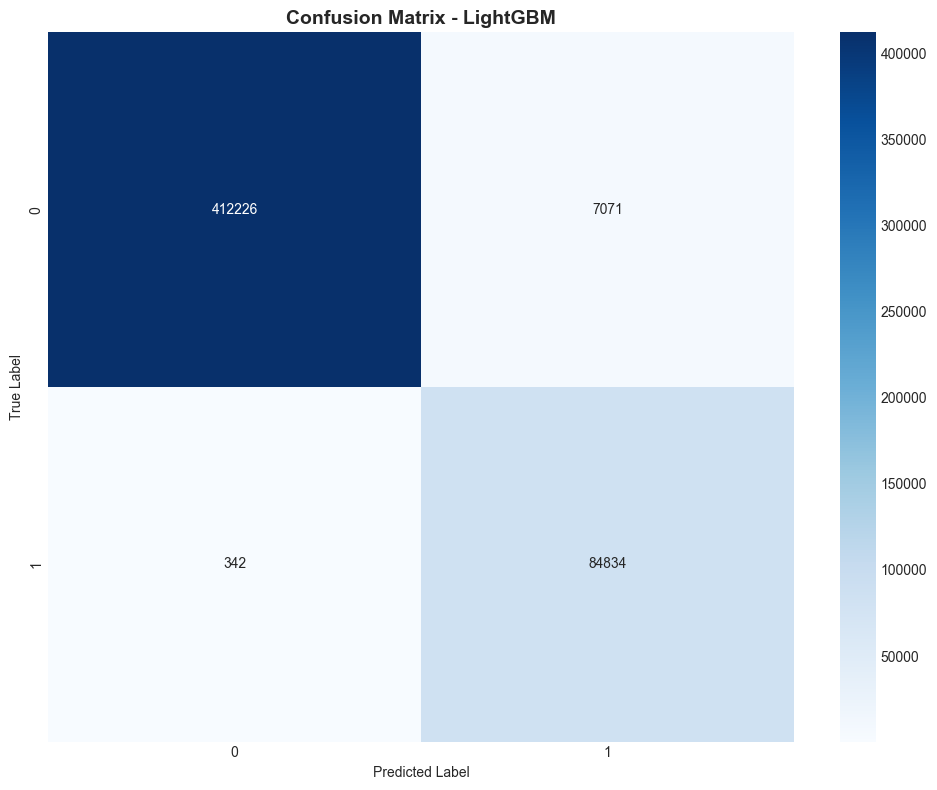

In [18]:
print("\n=== Training LightGBM Classifier ===")

# LightGBM parameters
lgb_params = config['models']['lightgbm']

lgb_model = lgb.LGBMClassifier(
    n_estimators=lgb_params['n_estimators'],
    max_depth=lgb_params['max_depth'],
    learning_rate=lgb_params['learning_rate'],
    num_leaves=lgb_params['num_leaves'],
    random_state=lgb_params['random_state'],
    n_jobs=-1,
    verbose=-1
)

# Train
print("\nTraining LightGBM...")
start_time = time.time()
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)]
)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Evaluate
lgb_metrics = evaluate_model(
    lgb_model,
    X_test,
    y_test,
    model_name="LightGBM",
    label_encoder=label_encoder
)
lgb_metrics['training_time'] = training_time

# Plot confusion matrix
plot_confusion_matrix(lgb_metrics['confusion_matrix'], label_encoder.classes_, "LightGBM")

## 7. Model 4: Support Vector Machine (SVM)


=== Training SVM Classifier ===
Note: SVM training may take longer with large datasets
Training on 10000 samples...

Training SVM...
[LibSVM]✓ Training completed in 0.48 seconds

Evaluating SVM

Accuracy:  0.9616
Precision: 0.9611
Recall:    0.9616
F1-Score:  0.9607

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    419297
           1       0.94      0.83      0.88     85176

    accuracy                           0.96    504473
   macro avg       0.95      0.91      0.93    504473
weighted avg       0.96      0.96      0.96    504473



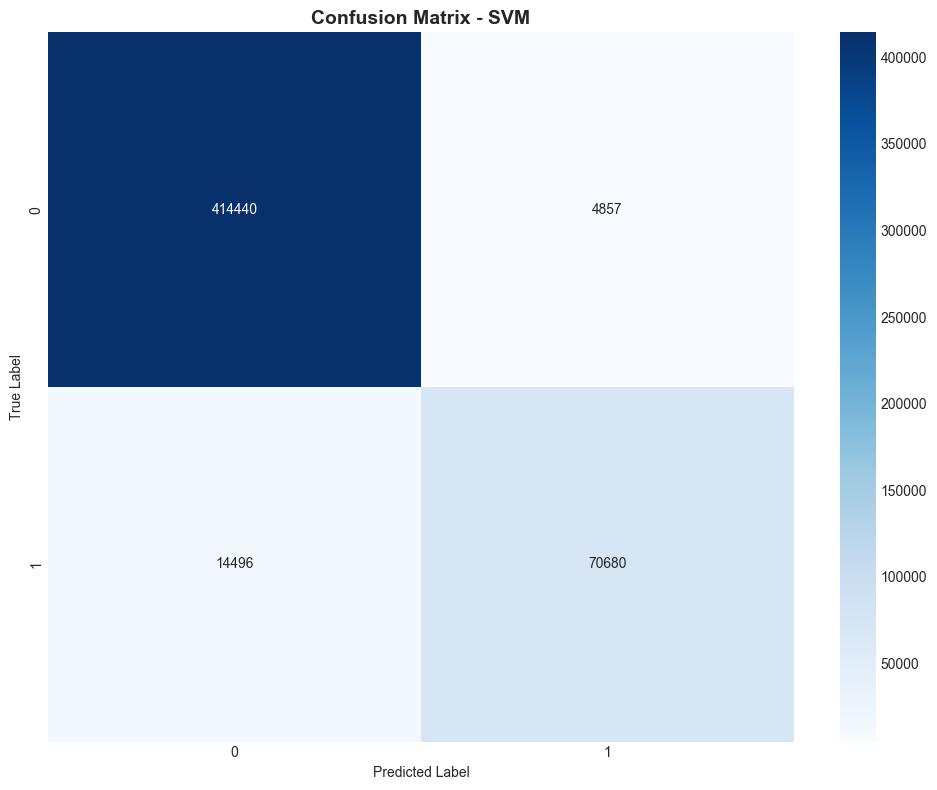

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time

print("\n=== Training SVM Classifier ===")
print("Note: SVM training may take longer with large datasets")

# Use a subset for SVM due to computational cost
svm_sample_size = min(10000, len(X_train))
X_train_svm = X_train[:svm_sample_size]
y_train_svm = y_train[:svm_sample_size]

print(f"Training on {svm_sample_size} samples...")

# Scale subset
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(X_train_svm)
X_test_scaled = scaler_svm.transform(X_test)

# SVM parameters
svm_params = config['models']['svm']

svm_model = SVC(
    kernel=svm_params['kernel'],
    C=svm_params['C'],
    gamma=svm_params['gamma'],
    random_state=svm_params['random_state'],
    verbose=True
)

# Train
print("\nTraining SVM...")
start_time = time.time()
svm_model.fit(X_train_svm, y_train_svm)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Evaluate
svm_metrics = evaluate_model(
    svm_model,
    X_test_scaled,
    y_test,
    model_name="SVM",
    label_encoder=label_encoder
)
svm_metrics['training_time'] = training_time

# Plot confusion matrix
plot_confusion_matrix(svm_metrics['confusion_matrix'], label_encoder.classes_, "SVM")

## 8. Model 5: Decision Tree Classifier


=== Training Decision Tree Classifier ===

Training Decision Tree...
✓ Training completed in 410.37 seconds

Evaluating Decision Tree

Accuracy:  0.9893
Precision: 0.9898
Recall:    0.9893
F1-Score:  0.9894

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    419297
           1       0.94      1.00      0.97     85176

    accuracy                           0.99    504473
   macro avg       0.97      0.99      0.98    504473
weighted avg       0.99      0.99      0.99    504473



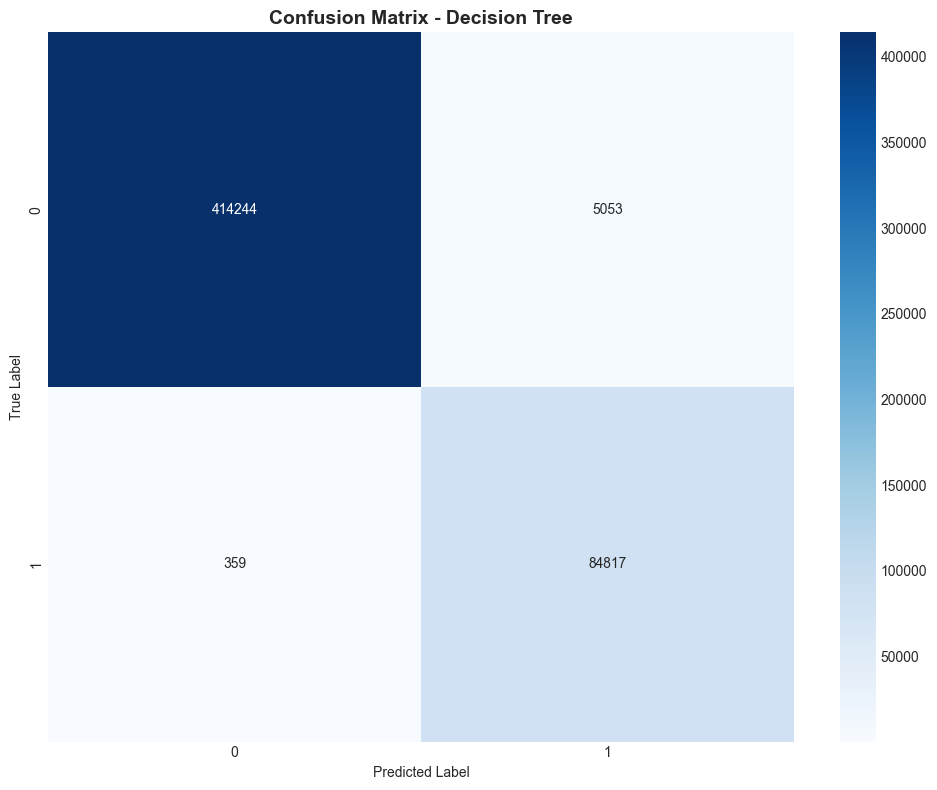

In [20]:
print("\n=== Training Decision Tree Classifier ===")

# Decision Tree parameters
dt_params = config['models']['decision_tree']

dt_model = DecisionTreeClassifier(
    max_depth=dt_params['max_depth'],
    min_samples_split=dt_params['min_samples_split'],
    min_samples_leaf=dt_params['min_samples_leaf'],
    random_state=dt_params['random_state']
)

# Train
print("\nTraining Decision Tree...")
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Evaluate
dt_metrics = evaluate_model(
    dt_model,
    X_test,
    y_test,
    model_name="Decision Tree",
    label_encoder=label_encoder
)
dt_metrics['training_time'] = training_time

# Plot confusion matrix
plot_confusion_matrix(dt_metrics['confusion_matrix'], label_encoder.classes_, "Decision Tree")

## 9. Unsupervised Learning: Isolation Forest (Anomaly Detection)

In [21]:
print("\n=== Training Isolation Forest (Anomaly Detection) ===")

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.1,  # Expected proportion of outliers
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train on normal traffic only (BENIGN class = 0)
X_train_normal = X_train[y_train == 0]

print(f"\nTraining on {len(X_train_normal)} normal samples...")
start_time = time.time()
iso_forest.fit(X_train_normal)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.2f} seconds")

# Predict anomalies (1 = normal, -1 = anomaly)
y_pred_iso = iso_forest.predict(X_test)

# Convert to binary: 0 = normal, 1 = attack
y_pred_binary = (y_pred_iso == -1).astype(int)
y_test_binary = (y_test != 0).astype(int)

# Calculate metrics
iso_accuracy = accuracy_score(y_test_binary, y_pred_binary)
iso_precision = precision_score(y_test_binary, y_pred_binary, zero_division=0)
iso_recall = recall_score(y_test_binary, y_pred_binary, zero_division=0)
iso_f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)

print(f"\nAnomaly Detection Performance:")
print(f"Accuracy:  {iso_accuracy:.4f}")
print(f"Precision: {iso_precision:.4f}")
print(f"Recall:    {iso_recall:.4f}")
print(f"F1-Score:  {iso_f1:.4f}")

iso_metrics = {
    'accuracy': iso_accuracy,
    'precision': iso_precision,
    'recall': iso_recall,
    'f1_score': iso_f1,
    'training_time': training_time
}


=== Training Isolation Forest (Anomaly Detection) ===

Training on 1467538 normal samples...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.4s remaining:    2.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished


✓ Training completed in 6.26 seconds

Anomaly Detection Performance:
Accuracy:  0.7630
Precision: 0.1504
Recall:    0.0869
F1-Score:  0.1102


## 10. Hyperparameter Tuning: Random Forest


=== Hyperparameter Tuning: Random Forest ===
Note: This may take significant time

Searching on 5000 samples...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✓ Grid search completed in 37.91 seconds

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.9821

Training final model with best parameters...

Evaluating Random Forest (Tuned)

Accuracy:  0.9890
Precision: 0.9896
Recall:    0.9890
F1-Score:  0.9891

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    419297
           1       0.94      1.00      0.97     85176

    accuracy                           0.99    504473
   macro avg       0.97      0.99      0.98    504473
weighted avg       0.99      0.99      0.99    504473



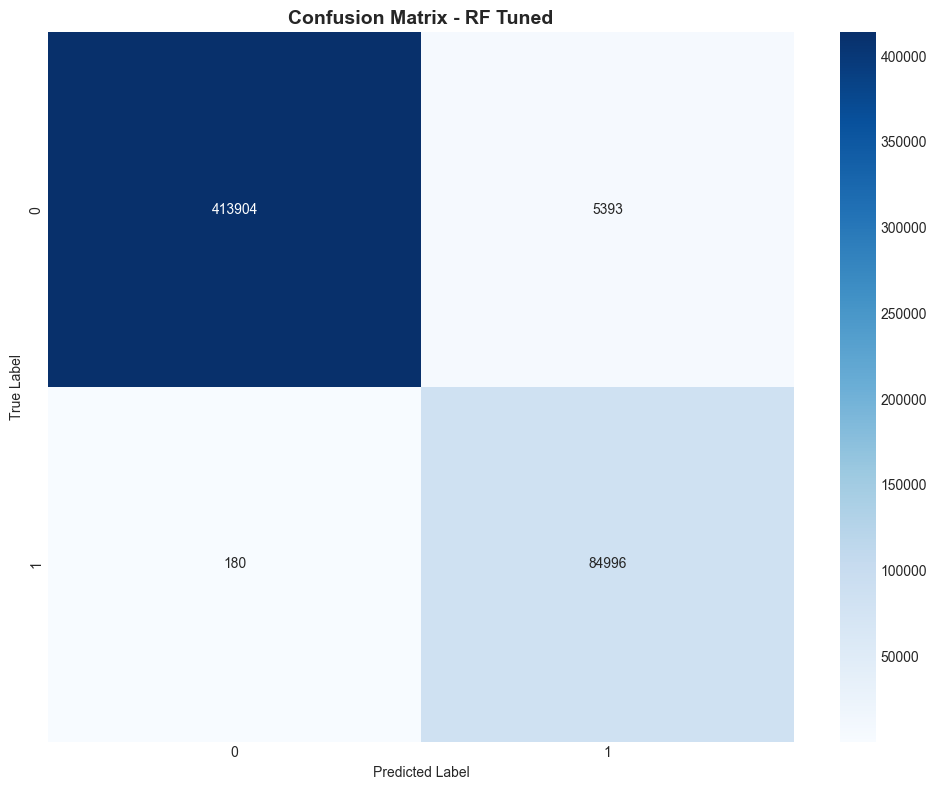

In [22]:
print("\n=== Hyperparameter Tuning: Random Forest ===")
print("Note: This may take significant time")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use smaller subset for grid search
grid_sample_size = min(5000, len(X_train))
X_train_grid = X_train[:grid_sample_size]
y_train_grid = y_train[:grid_sample_size]

print(f"\nSearching on {grid_sample_size} samples...")

# Grid search
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

start_time = time.time()
rf_grid.fit(X_train_grid, y_train_grid)
tuning_time = time.time() - start_time

print(f"\n✓ Grid search completed in {tuning_time:.2f} seconds")
print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")

# Train final model with best parameters on full training set
print("\nTraining final model with best parameters...")
rf_tuned = RandomForestClassifier(**rf_grid.best_params_, random_state=42, n_jobs=-1)
rf_tuned.fit(X_train, y_train)

# Evaluate tuned model
rf_tuned_metrics = evaluate_model(rf_tuned, X_test, y_test, "Random Forest (Tuned)")
plot_confusion_matrix(rf_tuned_metrics['confusion_matrix'], label_encoder.classes_, "RF Tuned")

## 11. Model Comparison


MODEL COMPARISON

           Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)
   Decision Tree    0.9893     0.9898  0.9893    0.9894           410.3670
        RF Tuned    0.9890     0.9896  0.9890    0.9891                NaN
   Random Forest    0.9888     0.9894  0.9888    0.9889           712.5982
         XGBoost    0.9874     0.9882  0.9874    0.9876            20.4249
        LightGBM    0.9853     0.9863  0.9853    0.9855            11.4186
             SVM    0.9616     0.9611  0.9616    0.9607             0.4795
Isolation Forest    0.7630     0.1504  0.0869    0.1102             6.2613


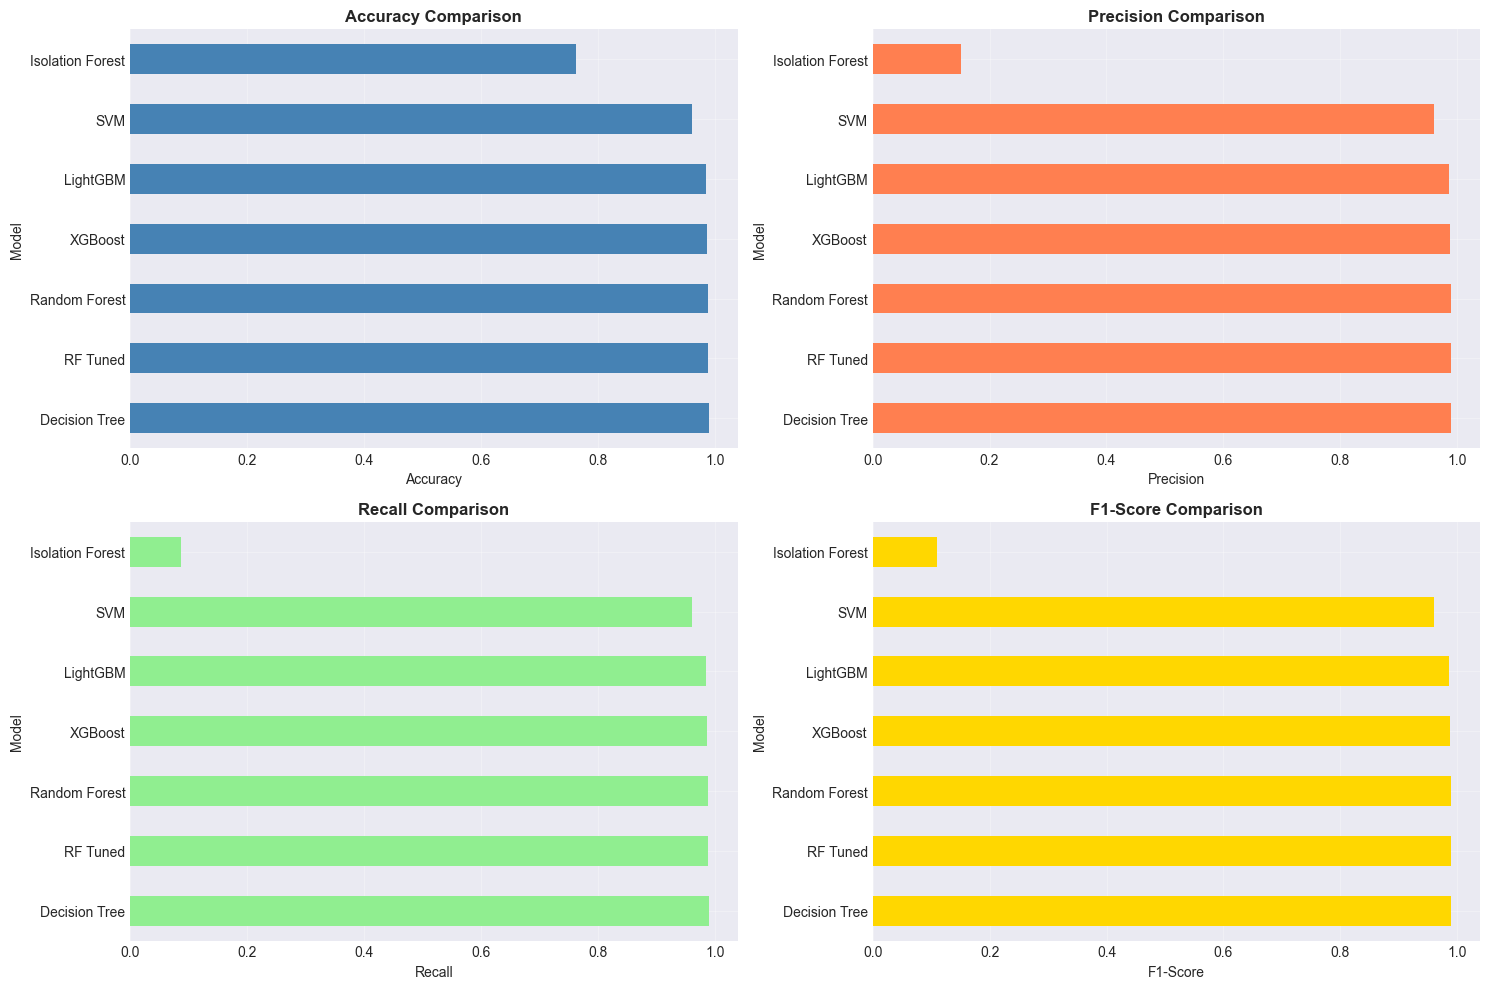

In [24]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

# Compile results
results = {
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgb_metrics,
    'SVM': svm_metrics,
    'Decision Tree': dt_metrics,
    'Isolation Forest': iso_metrics,
    'RF Tuned': rf_tuned_metrics
}

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [r['accuracy'] for r in results.values()],
    'Precision': [r['precision'] for r in results.values()],
    'Recall': [r['recall'] for r in results.values()],
    'F1-Score': [r['f1_score'] for r in results.values()],
    'Training Time (s)': [r.get('training_time', None) for r in results.values()]
})

comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\n" + comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['steelblue', 'coral', 'lightgreen', 'gold']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    ax = axes[idx // 2, idx % 2]
    comparison_df.plot(x='Model', y=metric, kind='barh', ax=ax, color=color, legend=False)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel(metric)
    ax.set_ylabel('Model')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
